# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [29]:
# Importing Pandas to clean data.
# Importing SQLite3 for easier querying of data.
# Importing Matplotlib, Matplotlib.pyplot, Seaborn, and Numpy for visualiztion.

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading data.
df1 = pd.read_csv('Michelin Guide Data_cleaned.csv')

df1['AwardNumerical'] = df1['Award'].str[:1]
df2 = df1.loc[df1['AwardNumerical'] != 'B']
df2['AwardNumerical'] = df2['AwardNumerical'].astype(int)
df3 = df2.loc[df1['Priciness'] != 'None']
df3['Priciness'] = df3['Priciness'].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 0 to 3378
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   3363 non-null   object 
 1   LocationCountry        3363 non-null   object 
 2   Latitude               3363 non-null   float64
 3   Longitude              3363 non-null   float64
 4   Cuisine                3363 non-null   object 
 5   Currency               3363 non-null   object 
 6   Priciness              3363 non-null   float64
 7   HasPhone               3363 non-null   bool   
 8   HasWebsite             3363 non-null   bool   
 9   FacilitiesAndServices  3363 non-null   object 
 10  Award                  3363 non-null   object 
 11  AwardNumerical         3363 non-null   int32  
dtypes: bool(2), float64(3), int32(1), object(6)
memory usage: 282.4+ KB


C:\Users\JChou\AppData\Local\Temp\ipykernel_26356\4188166528.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AwardNumerical'] = df2['AwardNumerical'].astype(int)
C:\Users\JChou\AppData\Local\Temp\ipykernel_26356\4188166528.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Priciness'] = df3['Priciness'].astype(float)


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

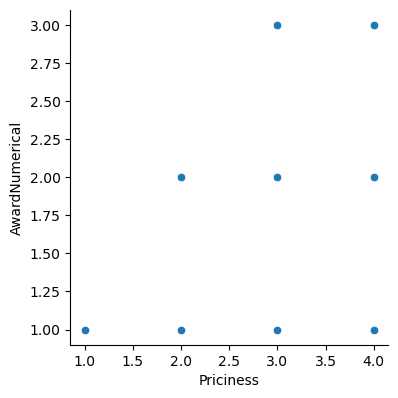

In [30]:
sns.pairplot(df3, x_vars=['Priciness'], 
             y_vars='AwardNumerical', height=4, aspect=1, kind='scatter')
plt.show()

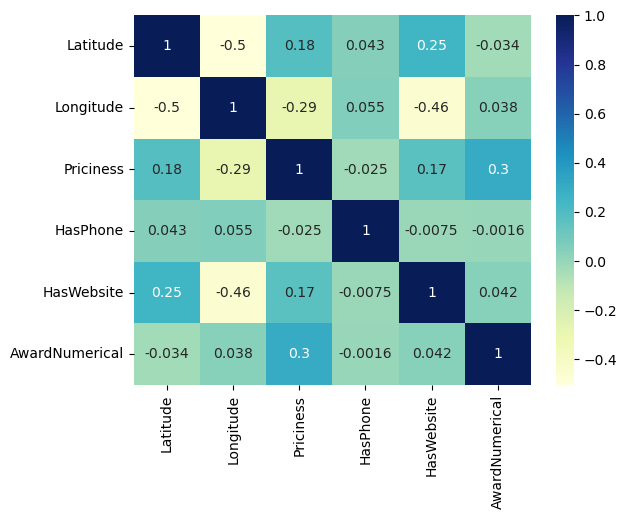

In [43]:
sns.heatmap(df3.corr(), cmap="YlGnBu", annot = True)
plt.show()

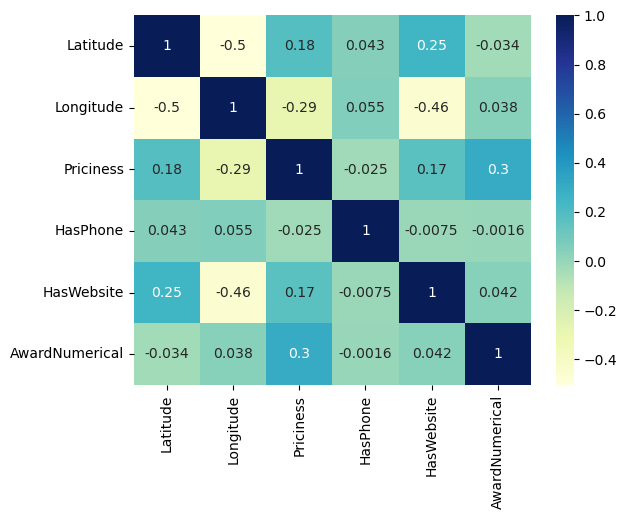

In [44]:
sns.heatmap(df3.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [34]:
X = df3['Priciness']
y = df3['AwardNumerical']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const        0.271336
Priciness    0.272352
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AwardNumerical   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     241.8
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.58e-52
Time:                        17:55:42   Log-Likelihood:                -1641.4
No. Observations:                2354   AIC:                             3287.
Df Residuals:                    2352   BIC:                             3298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2713      0.062      4.372      0.000       0.150       0.393
Priciness      0.2724      0.018     15.551      0.000       0.238       0.307
==============================================================================
Omnibus:                      881.874   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2728.674
Skew:                           1.955   Prob(JB):                         0.00
Kurtosis:                       6.541   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

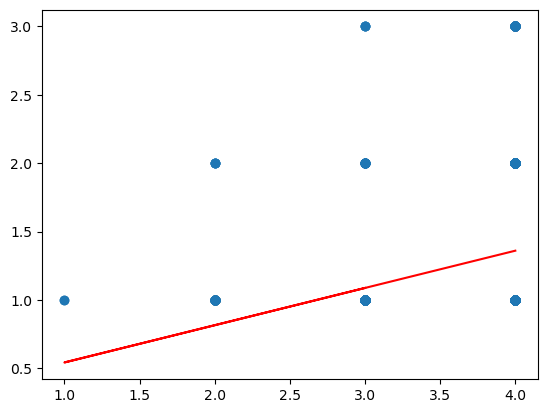

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.2713 + 0.2724*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\JChou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


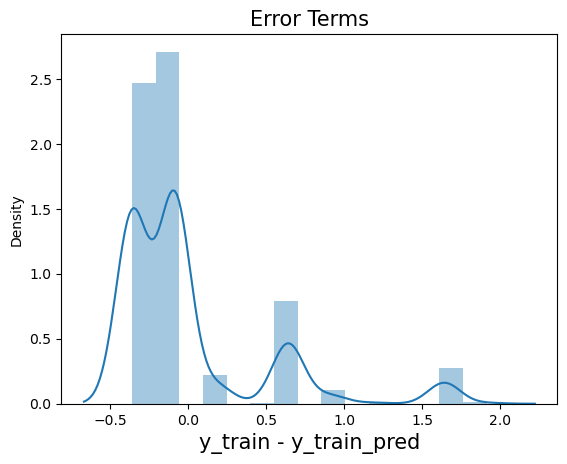

In [38]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

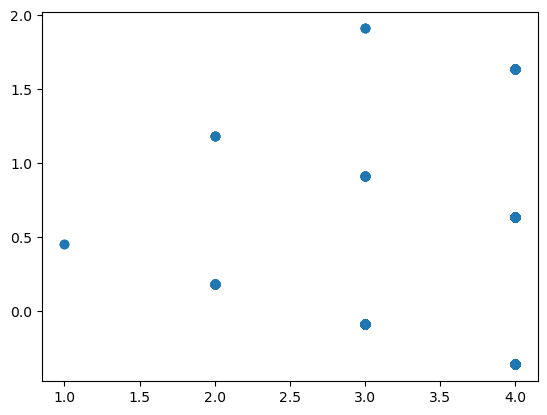

In [39]:
plt.scatter(X_train,res)
plt.show()

In [40]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred

966     1.088392
463     1.360745
316     1.360745
1280    1.360745
3254    1.360745
          ...   
1067    1.088392
1039    1.088392
279     1.360745
2325    1.360745
2855    0.816040
Length: 1009, dtype: float64

In [41]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.0874113593056558

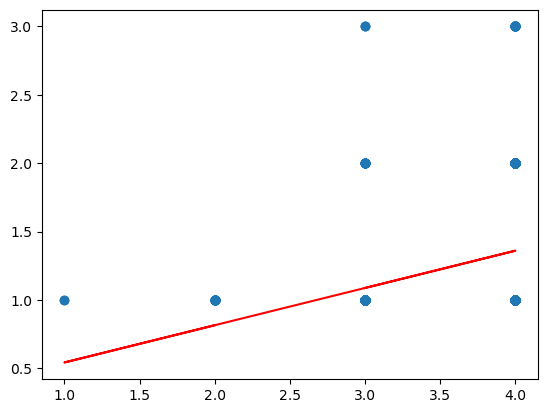

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.0874
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really